In [10]:
## 다변수 선형회귀
# 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?
# 팁 데이터셋은 데이터 시각화 패키지인 seaborn 패키지

import seaborn as sns

sns.get_dataset_names()

tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()


(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill : 테이블의 전체 지불 금액  
tip : 팁으로 낸 금액  
sex : 계산한 손님의 성별  
smoker : 손님 중 흡연자 포함 여부  
day : 요일  
time : 시간  
size : 테이블 인원수  

In [11]:
tips.head(100)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2


In [12]:
# 문자열을 실수화 하기 
# 수식에 데이터를 넣어서 계산할 것이기 때문에, 모든 데이터의 값이 실수화 한다.(sex,smoker,day,time) 
# get_dummies() 로 0,1 변환
# 카테고리데이터가 있다면 dummy variable 로 변환
#  원-핫 인코딩(One Hot Encoding) 

import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

# y값(tip) 컬럼 맨뒤로 빼서 순서 맞추기
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


$$y=w_1​x_1+w_2​x_2+w_3​x_3+w_4​x_4+w_5​x_5+w_6​x_6+w_7​x_7+w_8​x_8+w_9​x_9+w_{10}​x_{10}​+w_{11}​x_{11}+w_{12}​x_{12} + b $$

 x 정보가 12개입니다. 따라서 같은 원리로 각 x값을 조정할 수 있도록 각각의 x에 각기 다른 w를 곱하고, 상수 b 는 단 하나를 더해주죠.
 선형회귀 : 선형 방정식이라고 합니다. 다른 말로는 "다변수 일차방정식"이며 x에 개별 가중치를 곱해주는 것 이다.

In [14]:
## 다변수 데이터의 손실함수 만들기

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values


#  sklearn .train_test_split 을 사용한 train 과 test 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




(195, 12) (195,)
(49, 12) (49,)


In [22]:
# w 12개와 b 1개 준비
import numpy as np
W = np.random.rand(12)
b = np.random.rand()

# 모델준비
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# MSE 사용하여  손실함수 계산
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

## error 계산 
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


## 경사하강법에 의한 gradient를 다변수 방정식의 편미분을 이해하고 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)



dW: [268.85445378  32.92199089   7.8012572    4.00477471   4.5603473
   7.24568461   2.60538598   0.78402178   4.39791506   4.0187091
   2.75703644   9.04899547]
db: 11.806031911679968


1-9 변미분 다시 풀어보기

In [23]:
# 모델학습하기

# 학습률
LEARNING_RATE = 0.0001

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6.3511
Iteration 20 : Loss 2.1197
Iteration 30 : Loss 1.5914
Iteration 40 : Loss 1.5244
Iteration 50 : Loss 1.5149
Iteration 60 : Loss 1.5126
Iteration 70 : Loss 1.5111
Iteration 80 : Loss 1.5098
Iteration 90 : Loss 1.5085
Iteration 100 : Loss 1.5072
Iteration 110 : Loss 1.5059
Iteration 120 : Loss 1.5047
Iteration 130 : Loss 1.5034
Iteration 140 : Loss 1.5021
Iteration 150 : Loss 1.5008
Iteration 160 : Loss 1.4996
Iteration 170 : Loss 1.4983
Iteration 180 : Loss 1.4971
Iteration 190 : Loss 1.4958
Iteration 200 : Loss 1.4946
Iteration 210 : Loss 1.4933
Iteration 220 : Loss 1.4921
Iteration 230 : Loss 1.4909
Iteration 240 : Loss 1.4897
Iteration 250 : Loss 1.4884
Iteration 260 : Loss 1.4872
Iteration 270 : Loss 1.4860
Iteration 280 : Loss 1.4848
Iteration 290 : Loss 1.4836
Iteration 300 : Loss 1.4824
Iteration 310 : Loss 1.4812
Iteration 320 : Loss 1.4800
Iteration 330 : Loss 1.4789
Iteration 340 : Loss 1.4777
Iteration 350 : Loss 1.4765
Iteration 360 : Loss 1.4753
I

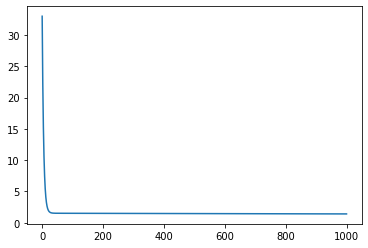

In [24]:
# W와 b의 값 그래프 확인 

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [27]:
W, b  ## 값 확인

# test 데이터 예측하여  loss값 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1.0626372027780364

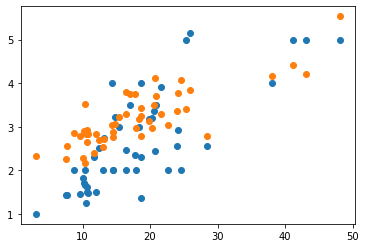

In [28]:
# prediction과 실제 정답인 y_test를 비교하여 정답률 그래프 확인
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()  # x축에는 total_bill을, y축에는 각각 tip값과 prediction 값을 표시

In [29]:
# 라이브러리로 깔끔하게 정리하기
# 모델 설계, 손실함수 정의, 기울기 계산 및 최적화 과정을 sklearn으로 진행하기


# 1.데이터준비 및 더미함수 사용하여 정수형데이터로
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

#  x(독립변수),y(종속변수) 및 train, test 데이터 분리
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델준비
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# test 데이터 예측

predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [30]:
# 정답 데이터와 비교해 모델의 성능을 평가

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

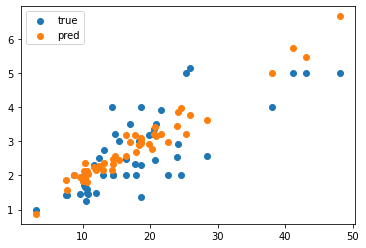

In [31]:
# 시각화(X= total_bill, y= tip)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()